In [3]:
import pandas as pd
import numpy as np

# Load the data
file_path = "/content/200_student_grades.xlsx"
df = pd.read_excel(file_path)

# Define tech-related and management-related subjects
tech_subjects = ["CS1001 IT in Business", "CS2016 Programming for Business", "CS2003 Data Structures & Business Applications"]
mgmt_subjects = ["MG1001 Fundamentals of Management", "MG2009 Data Analysis for Business II", "MG3015 Environmental Science and Sustainability for Business"]


In [4]:

grade_to_score = {
    "A+": 10, "A": 9, "A-": 8, "B+": 7, "B": 6, "B-": 5,
    "C+": 4, "C": 3, "C-": 2, "D": 1, "F": 0,
}

# Function to determine career path
def determine_career_path(row):
    tech_grades = row[tech_subjects]
    mgmt_grades = row[mgmt_subjects]

    tech_score = sum(grade_to_score[grade] for grade in tech_grades)
    mgmt_score = sum(grade_to_score[grade] for grade in mgmt_grades)

    return "Tech" if tech_score > mgmt_score else "Management"

# Apply the function to create a new 'CareerPath' column
df["CareerPath"] = df.apply(determine_career_path, axis=1)


In [8]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
# Grade-to-score mapping
grade_to_score = {
    "A+": 10, "A": 9, "A-": 8, "B+": 7, "B": 6, "B-": 5,
    "C+": 4, "C": 3, "C-": 2, "D": 1, "F": 0,
}

# Convert grades to numerical scores for all features
for col in tech_subjects + mgmt_subjects:
    df[col] = df[col].map(grade_to_score)  # Apply the mapping to each grade column

# Encode the target variable (Tech = 0, Management = 1)
label_encoder = LabelEncoder()
df["CareerPath"] = label_encoder.fit_transform(df["CareerPath"])

# Features and target variable
features = df[tech_subjects + mgmt_subjects]
target = df["CareerPath"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a RandomForest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # Now should work as grades are converted to numeric

# Make predictions on the test set
y_pred = rf.predict(X_test)


In [12]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)

# classification report
report = classification_report(y_test, y_pred, target_names=["Tech", "Management"])

print("Model Accuracy:", accuracy)
print("Classification Report:")
print(report)


Model Accuracy: 0.875
Classification Report:
              precision    recall  f1-score   support

        Tech       0.83      0.95      0.88        20
  Management       0.94      0.80      0.86        20

    accuracy                           0.88        40
   macro avg       0.88      0.88      0.87        40
weighted avg       0.88      0.88      0.87        40



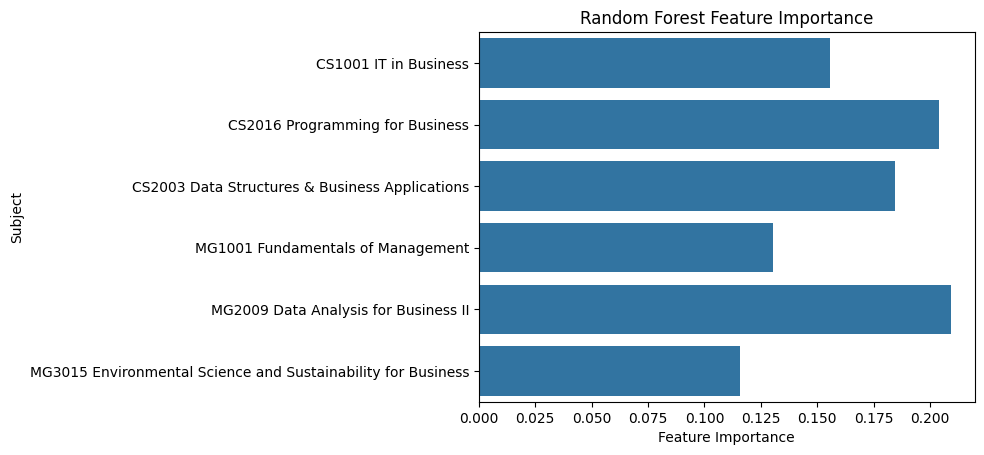

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the feature importance from the Random Forest model
feature_importance = rf.feature_importances_

# Plot the feature importance
sns.barplot(x=feature_importance, y=features.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Subject")
plt.title("Random Forest Feature Importance")
plt.show()


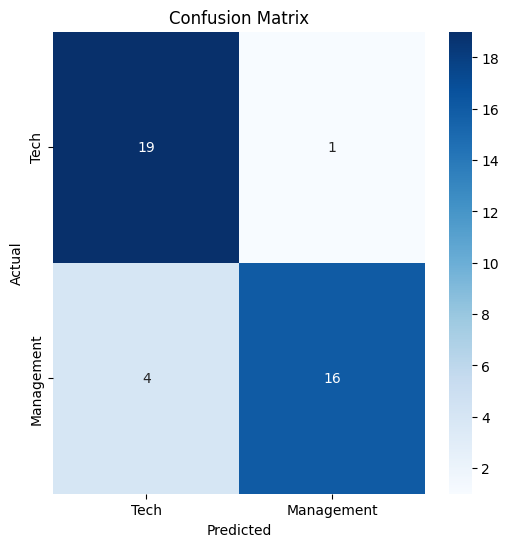

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Tech", "Management"], yticklabels=["Tech", "Management"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


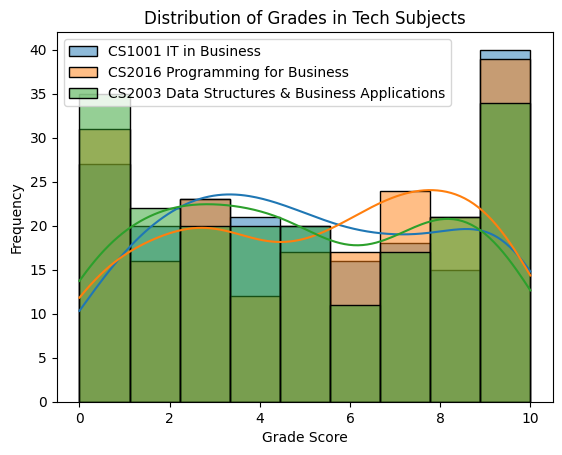

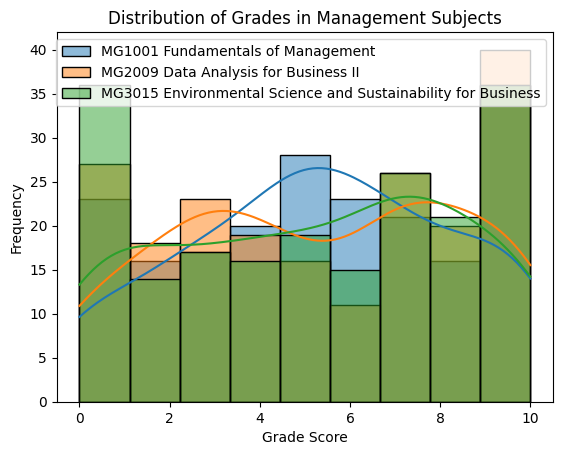

In [15]:
# Distribution of grades in tech subjects
for subject in tech_subjects:
    sns.histplot(df[subject], kde=True, label=subject)
plt.title("Distribution of Grades in Tech Subjects")
plt.xlabel("Grade Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Distribution of grades in management subjects
for subject in mgmt_subjects:
    sns.histplot(df[subject], kde=True, label=subject)
plt.title("Distribution of Grades in Management Subjects")
plt.xlabel("Grade Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()


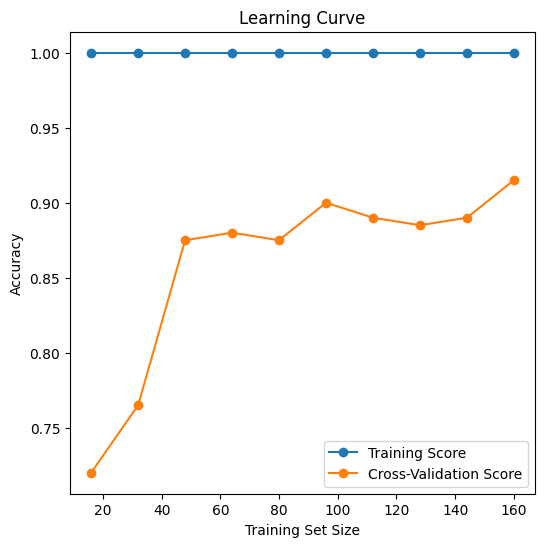

In [16]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    RandomForestClassifier(n_estimators=100, random_state=42),
    features,
    target,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy'
)

plt.figure(figsize=(6, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training Score')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), 'o-', label='Cross-Validation Score')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
